# Class and functions for moving the robot

In [14]:
from typing import List
from math import sin, cos, radians

class SkidRobot:
    def __init__(self, length, width, x=0, y=0) -> None:
        """Creates a robot

        Args:
            length (_type_): Uses Meters
            width (_type_): Uses Meters
        """
        self.length = length
        self.width = width
        self.x = x
        self.y = y
        self.theta = 0
    
    def move(self, Vl, Vr, dt=0.1):
        self.x -= (.5 * (Vl + Vr)) * sin(radians(self.theta)) * dt
        self.y += (.5 * (Vl + Vr)) * cos(radians(self.theta)) * dt
        self.theta += (1 / self.width) * (Vr - Vl) * dt
        
    def get_coords(self):
        return (self.x, self.y)
    
    def move_for_s(self, duration, Vl, Vr):
        path_x = []
        path_y = []
        
        # put loop in terms of dt = 0.1
        for _ in range(round(duration * 10)):
            path_x.append(self.x)
            path_y.append(self.y)
            self.move(Vl, Vr)

        # Store final point
        path_x.append(self.x)
        path_y.append(self.y)
        return path_x, path_y

    def get_bounds(self):
        return (self.width, self.length)

# Question 1

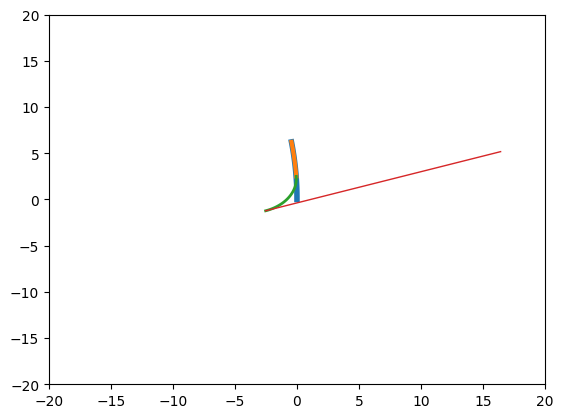

In [15]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation


fig = plt.figure()
ax = plt.axes(xlim=(-20,20), ylim=(-20,20))

# Run Robot
robo = SkidRobot(.5, .3)
x0, y0 = robo.move_for_s(5, 1, 1.5)
x1, y1 = robo.move_for_s(3, -1, -1.5)
x2, y2 = robo.move_for_s(8, .8, -2)
x3, y3 = robo.move_for_s(10, 2, 2)

line0, = ax.plot(x0, y0, lw=4)
line1, = ax.plot(x1, y1, lw=3)
line2, = ax.plot(x2, y2, lw=2)
line3, = ax.plot(x3, y3, lw=1)



# Question 2: 5m x 5m box

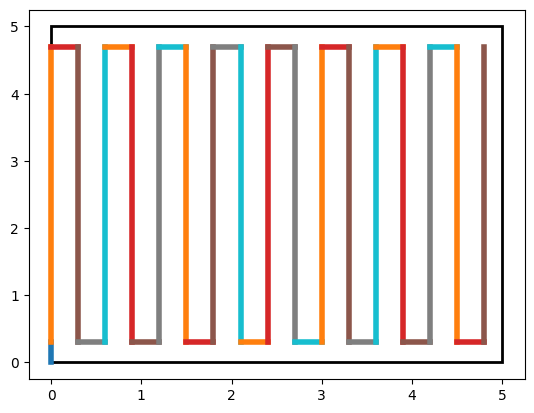

In [16]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
ax.set_xbound(0, 10)
ax.set_ybound(0, 10)
ax.add_patch(Rectangle((0, 0), 5, 5, facecolor="none", ec='k', lw=2))

robo = SkidRobot(.5, .3)
pathX = []
pathY = [] 
angMomentum = []
_, roboWidth = robo.get_bounds()

def getAngMomentum(sec, v1, v2, roboWidth):
    _, roboWidth = robo.get_bounds()
    deltaTheta = sec * ((v1 - v2) / roboWidth)
    return radians(deltaTheta)


# Move to starting position
sec, v1, v2 = 0.3, 1, 1
subPathX, subPathY = robo.move_for_s(sec, v1, v2)
subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)

pathX.append(subPathX)
pathY.append(subPathY)
angMomentum.append(subAngMomentum)

# Repeat coverage process
for _ in range(8):
    # Move to the end of the line
    sec, v1, v2 = 4.4, 1, 1
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

    # Turn -90 degrees in place
    sec, v1, v2 = 2, 6.75, -6.75
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

    # Move forward enough for coverage
    sec, v1, v2 = 0.3, 1, 1
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

    # Turn -90 degrees in place
    sec, v1, v2 = 2, 6.75, -6.75
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

    # Move to the end of the line
    sec, v1, v2 = 4.4, 1, 1
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

    # Turn 90 degrees in place
    sec, v1, v2 = 2, -6.75, 6.75
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

    # Move forward enough for coverage
    sec, v1, v2 = 0.3, 1, 1
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

    # Turn 90 degrees in place
    sec, v1, v2 = 2, -6.75, 6.75
    subPathX, subPathY = robo.move_for_s(sec, v1, v2)
    subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)
    
    pathX.append(subPathX)
    pathY.append(subPathY)
    angMomentum.append(subAngMomentum)

# Move to end position
sec, v1, v2 = 4.4, 1, 1
subPathX, subPathY = robo.move_for_s(sec, v1, v2)
subAngMomentum = getAngMomentum(sec, v1, v2, roboWidth)

pathX.append(subPathX)
pathY.append(subPathY)
angMomentum.append(subAngMomentum)

for index, path in enumerate(pathX):
    ax.plot(pathX[index], pathY[index], lw=4)

Graph the x, y, and angular momentum of Question 2

Text(0.5, 1.0, 'Position Y')

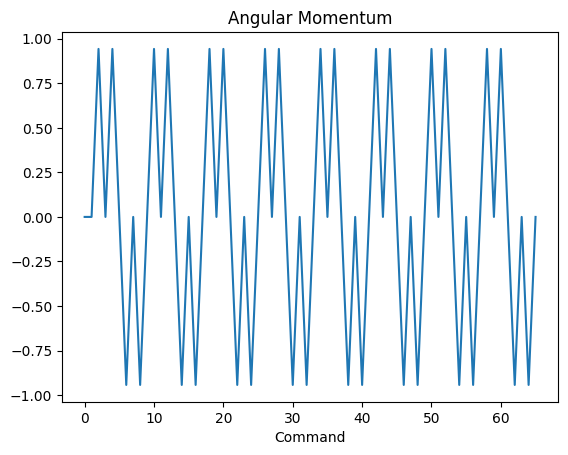

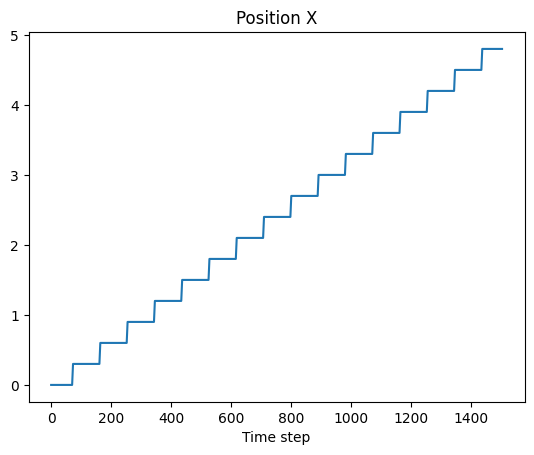

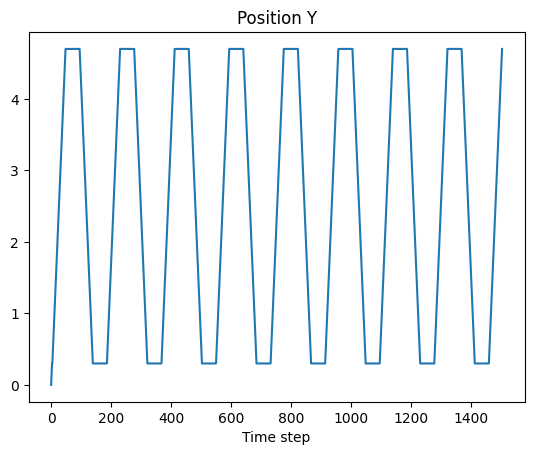

In [17]:
from matplotlib.patches import Rectangle
fig, ax = plt.subplots()
# Flatten lists
pathX = [item for sublist in pathX for item in sublist]
pathY = [item for sublist in pathY for item in sublist]
ax.plot(angMomentum)
ax.set_title("Angular Momentum")
ax.set_xlabel("Command") # as each command has constant angular momentum, this graphs by command and not time step

fig, ax = plt.subplots()
ax.plot(pathX, label="x")
ax.set_xlabel("Time step")
ax.set_title("Position X")

fig, ax = plt.subplots()
ax.plot(pathY, label="y")
ax.set_xlabel("Time step")
ax.set_title("Position Y")